In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Synthetic Data Generation

### User Ideologies
Consider user Ideologies are Bernoulli, with probability of being Left as $\theta$ and Right as $(1 - \theta$)

Generating from Beta Distribution.

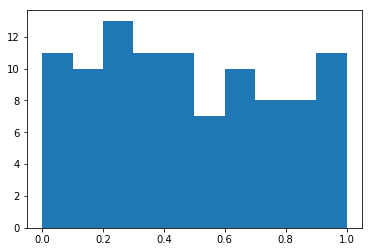

In [45]:
np.random.seed(55)
userIdeologies = np.random.beta(0.9,0.9,100)
plt.hist(userIdeologies, bins=np.arange(0,1.1,0.1))
plt.show()

In [47]:
usersDf = pd.DataFrame(userIdeologies, columns=["ideology"])
usersDf.head()

,ideology
0,0.682968
1,0.665868
2,0.967143
3,0.102033
4,0.046748


### Posts

Let us consider there are $N$ words belonging to two topics Left or Right.
Generate:

$P(Word=1|Topic=Right) \sim \beta(1,1)$

$P(Word=1|Topic=Left) \sim \beta(1,1)$

$P(Word=1) = \sum_{topic} {P(Word|Topic) P(Topic)}$, where $P(Topic) \sim Bernoulli(\theta_t)$

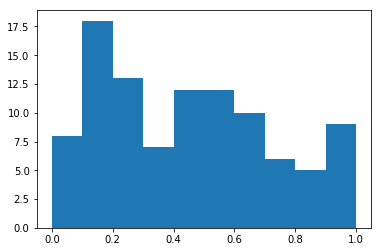

In [12]:
# Prob(Word=1|Topic="Right")
numWords = 100
np.random.seed(23)
wordsGivenRight = np.random.beta(1,1,numWords)
plt.hist(wordsGivenRight, bins=np.arange(0,1.1,0.1))
plt.show()

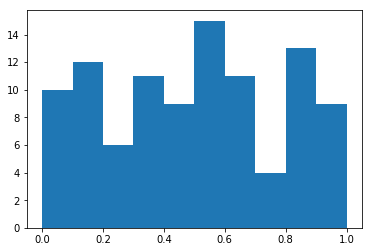

In [4]:
# Prob(Word=1|Topic="Left")
np.random.seed(12)
wordsGivenLeft = np.random.beta(1,1,100)
plt.hist(wordsGivenLeft, bins=np.arange(0,1.1,0.1))
plt.show()

Consider Posts are also Bernoulli, with probability of being Left as $\theta_t$ and Right as $(1 - \theta_t$)

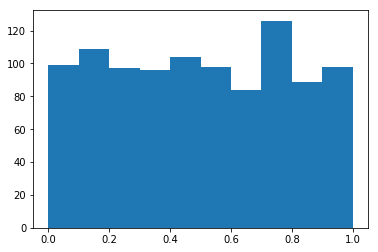

In [5]:
# Bernoulli Posts drawn from 
np.random.seed(43)
posts = np.random.beta(1,1,1000)
plt.hist(posts, bins=np.arange(0,1.1,0.1))
plt.show()

#### Post Features


In [6]:
def getProbWords(postBernoulli):
    return postBernoulli*wordsGivenLeft + (1-postBernoulli)*wordsGivenRight


In [7]:
wordFeatures = []
for i,postProb in enumerate(posts):
    wordsProb = getProbWords(postProb)
    features = np.array([np.random.binomial(1, p=wordsProb[i]) for i in range(len(wordsProb))])
    wordFeatures.append(features)
colsName = ["w"+str(k) for k in range(numWords)]
colsName.insert(0,"label")
postsDf = pd.DataFrame(np.column_stack((posts, np.array(wordFeatures))), columns=colsName)
postsDf.sample(10)

,label,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w90,w91,w92,w93,w94,w95,w96,w97,w98,w99
490,0.214326,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
201,0.590037,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
338,0.485656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
97,0.329077,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
864,0.072405,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
313,0.688327,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
806,0.222315,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
450,0.283854,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
498,0.790064,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
163,0.522449,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Clicks Generation

$P(click=1|\theta_t, \theta) = w_t \times logit^{-1} (-scale \times |\theta - \theta_t|)$, where $w_t \sim U(1,1.8)$ captures the eagerness of user to click and $scale$ captures how likely a user is to click posts with cross-cutting ideologies.

In [33]:
def invLogit(alpha):
    return  1 / (1 + np.exp(-1* alpha))

def getClickProb(userIdeology, postIdeology, scale=None):
    if scale is None: # can be either a preference of user or varied randomly
        scale = np.round(np.log(np.random.lognormal(4, 2)+1))
    err = np.abs(userIdeology - postIdeology)
    randomness = (0.8 * np.random.random_sample() + 1)  # can be either a preference of user or varied randomly for different timepoint
    return  randomness * invLogit(-scale*err)


#### Effect of scale on the click probability

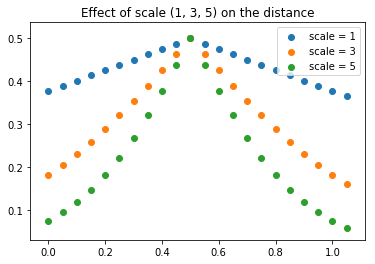

In [30]:
plt.scatter(np.arange(0, 1.1, 0.05), [invLogit(-1*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 1')
plt.scatter(np.arange(0, 1.1, 0.05), [invLogit(-3*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 3')
plt.scatter(np.arange(0, 1.1, 0.05), [invLogit(-5*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 5')
plt.title("Effect of scale (1, 3, 5) on the distance")
plt.legend()
plt.show()

In [ ]:
plt.scatter(np.arange(0, 1.1, 0.05), [1.0 * invLogit(-3*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 1')
plt.scatter(np.arange(0, 1.1, 0.05), [1.4 * invLogit(-3*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 3')
plt.scatter(np.arange(0, 1.1, 0.05), [1.8 * invLogit(-3*np.abs(n - 0.5)) for n in np.arange(0, 1.1, 0.05)], label='scale = 5')
plt.title("Effect of scale (1, 3, 5) on the distance")
plt.legend()
plt.show()

### Click History Generation at timestamp 0

For each user, randomly select $n$ posts.

Use click generation method and record the interaction.

In [52]:
numSamples = 50
historiesDf = None
for i,row in usersDf.iterrows():
    randomPosts = postsDf.sample(50).copy()
    postIdeology = randomPosts.label.values
    userIdeology = row["ideology"] * np.ones(numSamples)
    clicksProb = getClickProb(userIdeology, postIdeology)
    clicks = np.array([np.random.binomial(1, p=clicksProb[k]) for k in range(numSamples)])
    randomPosts["clicks"] = clicks
    randomPosts["user"] = i * np.ones(numSamples, dtype='int')
    randomPosts["postId"] = randomPosts.index
    if (historiesDf is None):
        historiesDf = randomPosts.copy()
    else:
        historiesDf = pd.concat([historiesDf,randomPosts],ignore_index=True)

        
print(historiesDf.shape)
historiesDf["timePoint"] = 0
historiesDf.sample(20)

(5000, 104)


,label,w0,w1,w2,w3,w4,w5,w6,w7,w8,...,w94,w95,w96,w97,w98,w99,clicks,user,postId,timePoint
4724,0.101351,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0,94,325,0
4298,0.106350,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1,85,891,0
4039,0.309933,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0,80,396,0
3217,0.350622,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0,64,153,0
1992,0.726685,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1,39,802,0
1196,0.296684,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,23,993,0
403,0.268018,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0,8,999,0
1649,0.221636,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0,32,98,0
713,0.750819,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1,14,40,0
1650,0.374323,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0,33,295,0


In [54]:
historiesExport = historiesDf.drop("label",axis=1)
historiesExport.head()

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w94,w95,w96,w97,w98,w99,clicks,user,postId,timePoint
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0,0,342,0
1,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1,0,670,0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1,0,458,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1,0,111,0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,0,793,0


In [55]:
historiesExport.to_csv("UserClicksHistoryT0.csv")